# Tools 1 Final Project

Jen Lee, Isaac Burmingham, & Dan Saubert

**Insert Dataset and motivation slide (1 points)**
- How/why the dataset was collected and a description of the metadata of your dataset.

**Insert Actual task definition/research question (2 points)**
- What real-world problem are you trying to solve? What are the input and output of your 

**Insert Literature review (2 points)**
- What other work has been done in this area, and how is your work novel compared to others?

## Data Gathering

In [1]:
# code for data gathering

## Data Cleaning

- Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.
 - What did you do about missing values and why? Handling missing values properly is very important.
- New feature/attribute creation and data summary statistics and interpretation.


**for ML analysis to work cleaned dataframe should have columns for 'post' & 'subreddit'**

In [2]:
# For now mkaing a dummy-dataframe
# pls don't make fun of my posts
# Note: more columns can be added these are just the base two we need
import pandas as pd

df = pd.DataFrame(columns = ['post', 'subreddit'])

df = df.append(pd.Series(["I love politics!", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Biden is bad", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Biden is good", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Trump is bad", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Trump is good", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Harris is bad", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["Harris is good", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["The government is terrible", "r/politics"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["The White House is White", "r/politics"], index=df.columns), ignore_index=True)

df = df.append(pd.Series(["pls send monnies its cold out", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["the sun is socialism", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["ur canceled", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["calm down, only 1000 americans dead", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["winter is a hoax", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["the election is a hoax", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["rhianna for prezident", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["i can haz president", "r/politics_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["this white house is on fiiiiire", "r/politics_dumb"], index=df.columns), ignore_index=True)

df = df.append(pd.Series(["airline food am I right??", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["photo of jerry seinfield", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["two nuns walk into a bar", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["two preists walk into a bar", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["pranked my coworker!", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["gorilla glue is not soap", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["and don't even get me started on airline food!", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["picture of a minion", "r/funny"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["people say boogers are funny, but they're snot", "r/funny"], index=df.columns), ignore_index=True)

df = df.append(pd.Series(["funny meme lol rawr", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["i can has cheezburger", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["shit-post funny lol", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["lawl comics me_irl", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["this was funnier the first time i saw it", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["screen-shot of tweet", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["look at this idiot", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["white screen with black background", "r/funny_dumb"], index=df.columns), ignore_index=True)
df = df.append(pd.Series(["hahahahaha omg laughter hahahaah", "r/funny_dumb"], index=df.columns), ignore_index=True)

# Subreddits (grouped together by how the model will operate)
subreddits = [["r/politics", "r/politics_dumb"], ["r/funny", "r/funny_dumb"]]

df.head() # print head to show success

,post,subreddit
0,I love politics!,r/politics
1,Biden is bad,r/politics
2,Biden is good,r/politics
3,Trump is bad,r/politics
4,Trump is good,r/politics


In [3]:
# code for data cleaning

import re

# proprocessor function (~should~) put post in lower-case plain-text with no symbols/punctuations
# Note: We might not want to use this actually but adding it anyway
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

Apply preprocessor and map classes:

In [4]:
import numpy as np

df['post'] = df['post'].apply(preprocessor)

# convert classes (subreddit) to integers 
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['subreddit']))}
class_mapping
df['class_mapping'] = df['subreddit'].map(class_mapping)

# TODO: Insert int-to-subreddit mappings

# Print head to show success
df.head()

,post,subreddit,class_mapping
0,i love politics,r/politics,2
1,biden is bad,r/politics,2
2,biden is good,r/politics,2
3,trump is bad,r/politics,2
4,trump is good,r/politics,2


## Analysis

In [5]:
# code for analysis

Test Train Split:

In [6]:
from sklearn.model_selection import train_test_split

def get_test_train_split(dataFrame):
    # TODO: Change line based on format of the dataframe
    X, y = df.iloc[:, 0].values, df.iloc[:, 1].values

    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
    
    return X_train, X_test, y_train, y_test


Create functions required to tokenize:

In [7]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

def tokenizer_porter(text):
    text = re.sub('<[^>]*>', '', text)
    
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
    
    tokenized = [porter.stem(word) for word in text.split()]
    return tokenized

Construct a TfidfVectorizer:

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf transforms text to feature vectors that can be used as 
# input to an estimator
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

### Model Optimization and Serialization

Grid search to find the optimal hyperparameters (including choice of stemming algorithm for TfidfVectorizer):

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords

from sklearn.linear_model import SGDClassifier

stop = stopwords.words('english')

# param_grid is all the possible methods to try when creating classifier
param_grid = [{'vect__ngram_range': [(1, 1), (3, 3), (1, 4)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2']},
              {'vect__ngram_range': [(1, 1), (3, 3), (1, 4)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter], 
               'clf__penalty': ['l1', 'l2'],
               'clf__class_weight': ['balanced', None],
               'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07)},
              ]


sgd_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))])

# grid search loops through param_grid finding with paramaters 
# will create the most successful classifer
gs_sgd_tfidf = GridSearchCV(sgd_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)


In [11]:
# TODO: Try only fitting once vs. fitting for each dataset

# Storing all these as arrays to store info on multiple models 
best_params = [None] * len(subreddits)
cv_accuracy = [None] * len(subreddits)
clf = [None] * len(subreddits)
X_train = [None] * len(subreddits)
X_test = [None] * len(subreddits)
y_train = [None] * len(subreddits)
y_test = [None] * len(subreddits)

for i in range(len(subreddits)):
    # Create test-train split based on subreddit/shitpost version of subreddit
    sub_df = df.loc[df["subreddit"] == subreddits[i][0]]
    sub_df = sub_df.append(df.loc[df["subreddit"] == subreddits[i][1]])
    
    X_train[i], X_test[i], y_train[i], y_test[i] = get_test_train_split(sub_df)
    
    print(f"\nGrid Search Fit for {subreddits[i]}\n")
    gs_sgd_tfidf.fit(X_train[i], y_train[i])
    
    best_params[i] = gs_sgd_tfidf.best_params_
    cv_accuracy[i] = gs_sgd_tfidf.best_score_
    clf[i] = gs_sgd_tfidf.best_estimator_


Grid Search Fit for ['r/politics', 'r/politics_dumb']

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.3s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s



Grid Search Fit for ['r/funny', 'r/funny_dumb']

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.3s finished


### Grid Search Results

In [12]:
clf_accuracy = [None] * len(subreddits)

for i in range(len(subreddits)):
    print(f"\nSubreddits: {subreddits[i]}")

    print('\tBest parameter set: %s ' % best_params[i])
    #print('Best parameter set: %s ' % gs_sgd_tfidf.best_params_)

    print('\tCV Accuracy: %.3f' % cv_accuracy[i])
    #cv_accuracy = gs_sgd_tfidf.best_score_
    #print('\nCV Accuracy: %.3f' % cv_accuracy)
    
    # The final classifier we use, should use what the grid search 
    # found to be the best params

    clf_accuracy[i] = clf[i].score(X_test[i], y_test[i])
    print('\tTest Accuracy: %.3f' % clf_accuracy[i])
    #clf = gs_sgd_tfidf.best_estimator_
    #clf_test_accuracy = clf.score(X_test, y_test) 
    #print('Test Accuracy: %.3f' % clf_test_accuracy)
    
    


Subreddits: ['r/politics', 'r/politics_dumb']
	Best parameter set: {'clf__alpha': 1e-05, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then'

Fit the classifier against entire dataset:

**NOTE**: The purpose of fitting the clasifier against the entire dataset is for the purpose of if we wanted to give it some sort of fake post, and have it guess which subreddit it falls in. We might not want to do this but leaving in for now.

In [ ]:
#from sklearn.feature_extraction.text import HashingVectorizer

# Using paramaters found in grid search
#clf = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, penalty='l2')

#vect = HashingVectorizer(decode_error='ignore', 
#                         n_features=2**21,
#                         preprocessor=None, 
#                         tokenizer=tokenizer)

#X = vect.transform(X)
#clf = clf.fit(X, y)

## Visualizations 

- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.).
- Describe anything you find in the data after each visualization.
- What data visualization helped you understand about data distribution.
- What you did about possible outlier as per data distribution visualization. (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook if you decided to remove it?)

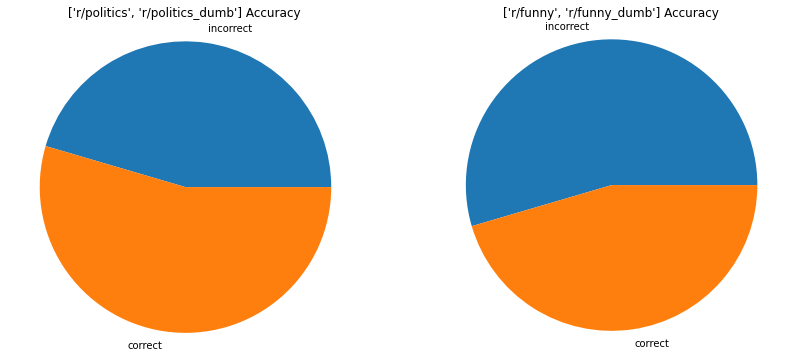

In [13]:
import matplotlib.pyplot as plt

# pie chart showing accuracy

fig,ax=plt.subplots(1, len(subreddits),figsize=(14,6),num=1)

for i in range(len(subreddits)):
    ax[i].pie([(1 - clf_accuracy[i]), clf_accuracy[i]], 
       labels=["incorrect", "correct"])
    ax[i].set_title(f"{subreddits[i]} Accuracy")
    ax[i].axis("equal")

plt.show()